<a href="https://colab.research.google.com/github/vishant750/Online_Retail_Customer_Segmentation/blob/main/Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title - Online Retail Customer Segmentation.**

## **Problem Description**

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01-Dec-2010 and 09-Dec-2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## **Data Description**


### **Attribute Information:**
* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

# **Customer segmentation:**
### Customer segmentation is the process by which you divide your customers up based on common characteristics so you can market to those customers more effectively.

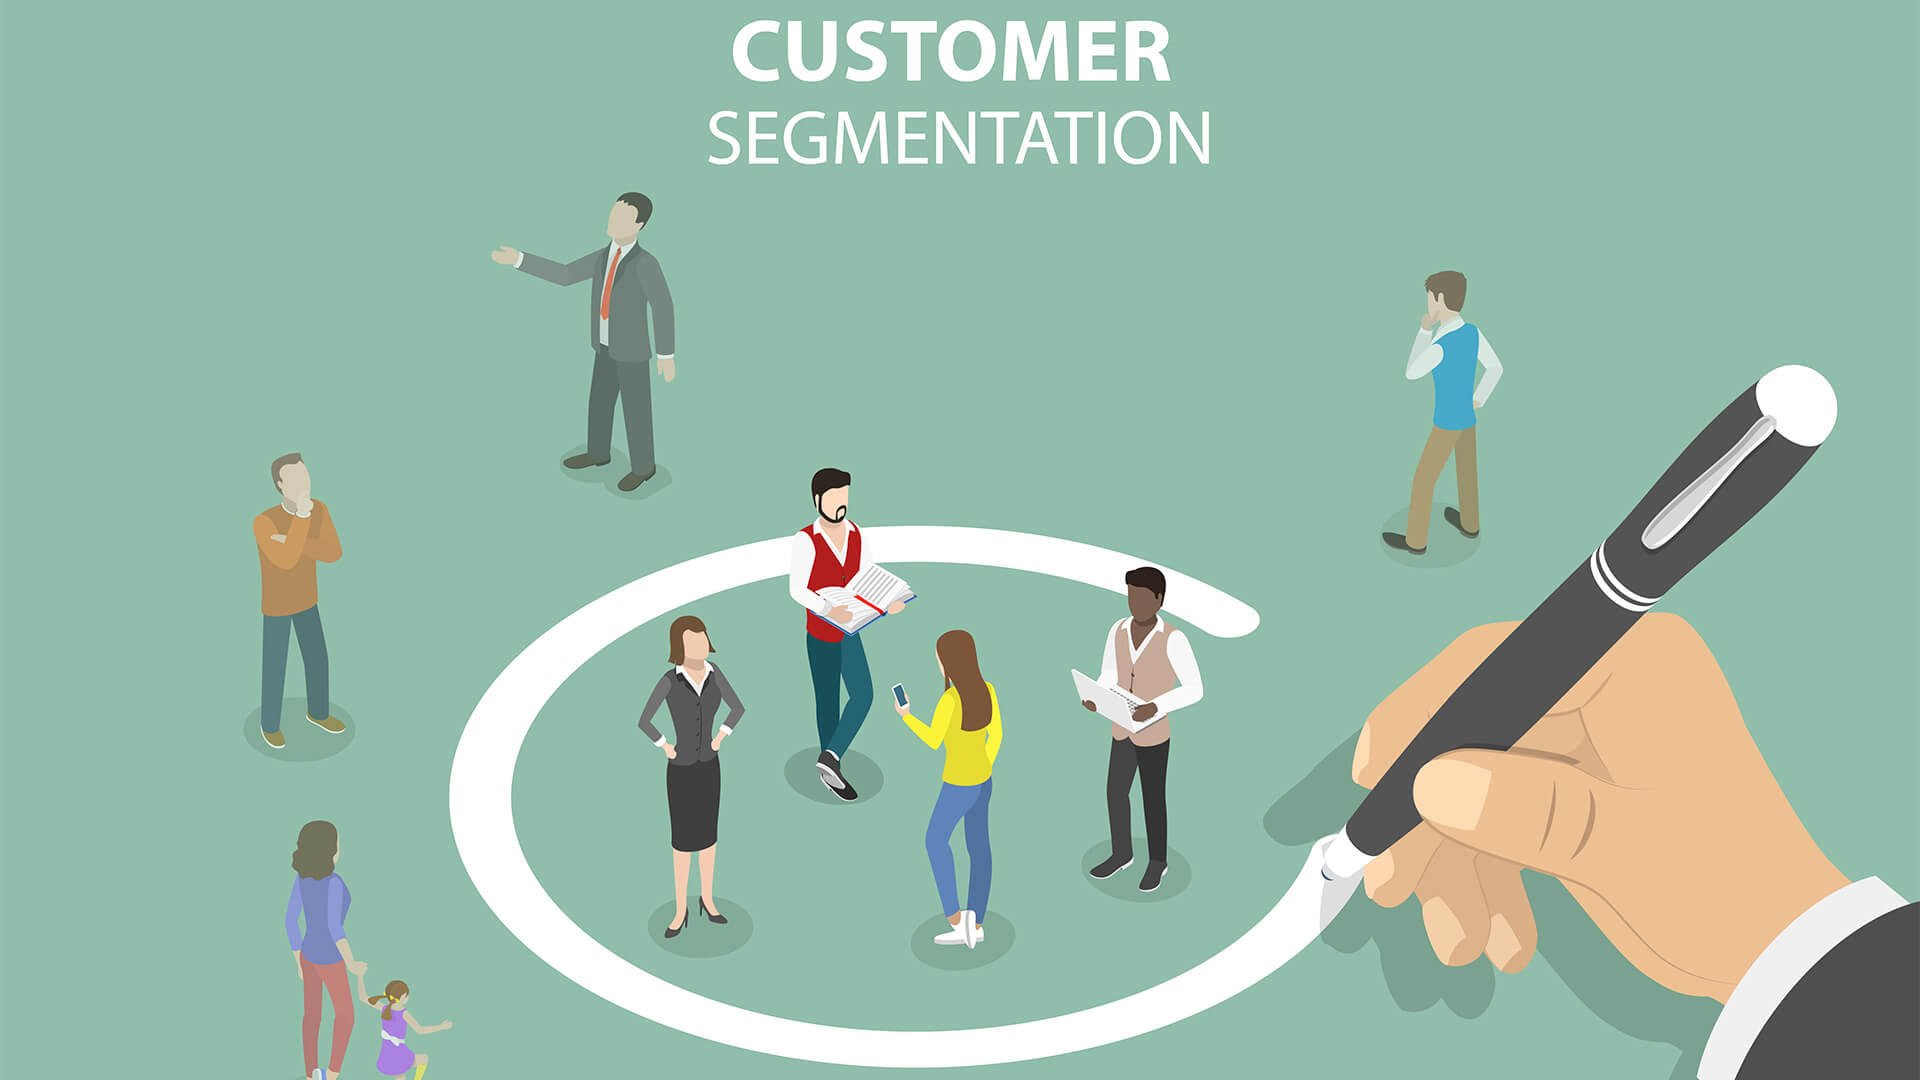

## **Different ways of segmentaion:**

### 1. Behavioral Segmentation
### 2. Geographic Segmentaion
### 3. Needs based Segmentation
### 4. Demographic Segmentation

###and many more...

## **Benefits of customer segmentation:**
### 1.Organised customer bases.
### 2.Targeted communication becomes easy.
### 3.Choosing top sales prospects becomes easy.
###and many more...

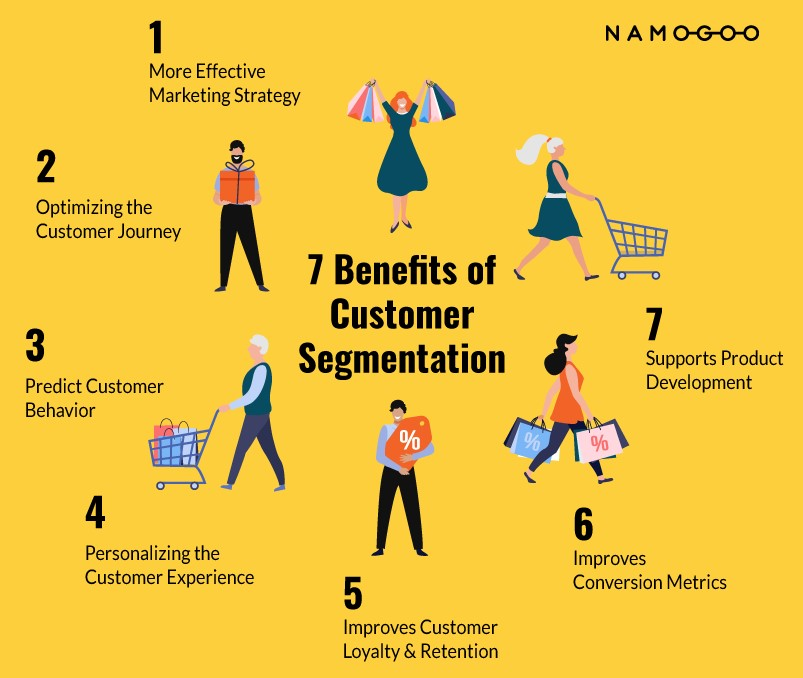

## **I'll be performing behavioral segmentation on our data in this project**
## **Project Flowchart:**
### 1.Initial preparations
### 2.Data Cleaning
### 3.Feature Engineering
### 4.EDA
### 5.Forming the segmentation criteria
### 6.Pre processing the data
### 7.Model Implementation
### 8.Conclusion

## **Initial preparations:**

In [1]:
#Loading in the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt

from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
customer_segmentation_df=pd.read_csv('/content/drive/MyDrive/Online Retail.xlsx - Online Retail.csv')

## **Data Cleaning:**
## Data Exploration

In [4]:
#First 5 observation of dataset
customer_segmentation_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [5]:
#Last 5 rows
customer_segmentation_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


In [6]:
#Shape of dataset
customer_segmentation_df.shape

(541909, 8)

In [7]:
#Concise Summary of dataset
customer_segmentation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
#Statistical description of dataset
customer_segmentation_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## Handling null values:
### Missing data is defined as the values or data that is not stored (or not present) for some variable/s in the given dataset.Missing values can bias the results of the machine learning models and/or reduce the accuracy of the model.Therefore it is an essential practice to handle null values before training our model. There are two main ways of handling null values, one is to delete the observations containing null values and the other is to impute the null values with some meaning full values.

In [9]:
customer_segmentation_df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### There isn't any meaningfull way to impute values in the Description and CustomerID column, therefore I will just delete them.

In [10]:
#Dropping the null values in the dataset
customer_segmentation_df.dropna(inplace=True)

In [11]:
#Checking for appended dataset
customer_segmentation_df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### The null values have been deleted.

## Handling Duplicated Values

### When two features have the same set of values they are known as duplicate values.Duplicate values can cause detrimental effect on our accuracy. Duplicate values can ruin the split between train,test and validation set, which ultimately leads to a biased performance estimates that disappoint the model in production.The best way of dealing with duplicate values is to delete them.

In [15]:
#Checking if our dataset has duplicated values
customer_segmentation_df.duplicated().sum()

5225

In [18]:
#Deleting the duplicated values
customer_segmentation_df.drop_duplicates(inplace=True)

In [19]:
#Checking if all the duplicated values have been deleted
customer_segmentation_df.duplicated().sum()

0

### As we can see that all the duplicate values have been removed.

## **Removing Outliers**
### Outliers are those data points that are significantly different from the rest of the data points in the dataset. These can cause the data to skew and affect the accuracy of the ML model.

In [21]:
#Checking the features of the dataset
customer_segmentation_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### We can see that features Quatity and UnitPrice can have outliers


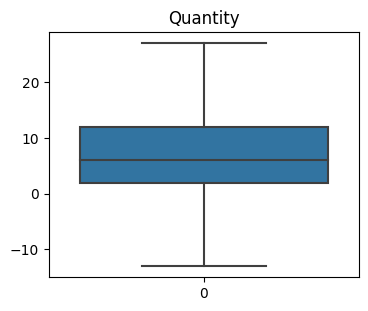

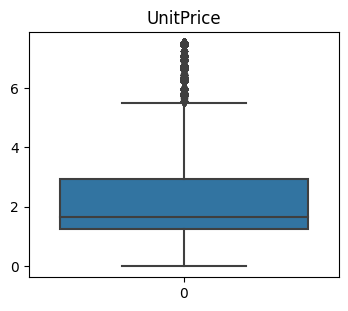

In [41]:
#Defining a list for potential outliers features
pot_out_features=['Quantity','UnitPrice']
for index,value in enumerate(pot_out_features):
  plt.figure(figsize=(4,7))
  plt.subplot(2,1,index+1)
  sns.boxplot(customer_segmentation_df[value])
  plt.title(value)

### We can see that both the features have outliers, defining a function to handle these outliers

In [39]:
#Function for handling outliers
def handling_outliers(data:pd.DataFrame,feature:str):
  #Calculating the upper and lower limit
  q1=data[feature].quantile(0.25)
  q3=data[feature].quantile(0.75)
  IQR=q3-q1
  upper_limit=q3+(1.5*IQR)
  lower_limit=q1-(1.5*IQR)
  #deleting datapoints above and below upper and lower limits
  data = data[(data[feature]>=lower_limit) & (data[feature]<=upper_limit)]  
  return data       
      

In [40]:
#Applying the outliers removal process on the two features
customer_segmentation_df=handling_outliers(customer_segmentation_df,'Quantity')
customer_segmentation_df=handling_outliers(customer_segmentation_df,'UnitPrice')

## **Removing cancelled orders**

### n our data, we have cancelled orders which are represented by a capital C before the Invoice number. eg: C536379. I will be removing them from the dataset.

In [55]:
#Converting each value to string for comparison
customer_segmentation_df['InvoiceNo']=customer_segmentation_df['InvoiceNo'].astype(str)

In [58]:
def cancelled 
 (customer_segmentation_df['InvoiceNo'][1])

str